In [1]:
import random as rng
from itertools import product
from collections import Counter

<h3> DEFINICJA OBIEKTU KARTA </h3>
<p> karta może być figurą od 2 do A, i mieć kolor:<br> [H]eart [D]iamonds [C]lubs [S]pades<br> KIER___KARO_____TREFL__PIK</p>

<p>kazda figura ma przypisaną rangę (self.rank) od 0 do 12. <br>Rangi pozwalają na sortowanie kart</p>

In [2]:
class Card:
    def __init__(self,fig,col):
        self.slownik =[
            {
            '2' : '2',
            '3' : '3',
            '4' : '4',
            '5' : '5',
            '6' : '6',
            '7' : '7',
            '8' : '8',
            '9' : '9',
            '10' : '10',
            'J' : 'Jack',
            'Q' : 'Queen',
            'K' : 'King',
            'A' : 'Ace'},
            {
            'H': 'Hearts',
            'D': 'Diamonds',
            'C': 'Clubs',
            'S': 'Spades'}
            ]
        
        
        while fig.upper() not in self.slownik[0].keys():
            print('błędne oznaczenie figury karty')
            fig = input('Podaj poprawne oznaczenie figury karty: ')
        self.figure = fig.upper()
        
        while col.upper() not in self.slownik[1].keys():
            print('błędne oznaczenie koloru karty')
            col = input('Podaj poprawne oznaczenie koloru karty: ')
        self.colour = col.upper()
        

        rank_dict = {figure : rank for rank,figure in enumerate(self.slownik[0].keys())}
        self.rank_of_card = rank_dict[self.figure]

    def __enter__(self):
        return self

    def __str__(self):
        return f'{self.slownik[0][self.figure]} of {self.slownik[1][self.colour]}'
    
    def __repr__(self):
        return f'{self.figure}{self.colour}'

    def __lt__(self,other):
        return self.rank_of_card < other.rank_of_card
    def __le__(self,other):
        return self.rank_of_card <= other.rank_of_card
    def __gt__(self,other):
        return self.rank_of_card > other.rank_of_card
    def __ge__(self,other):
        return self.rank_of_card >= other.rank_of_card
    def __eq__(self,other):
        return self.rank_of_card == other.rank_of_card


<p>małe testy karty </p>

In [3]:
print(Card('A', 'D').__repr__())
print(Card('3', 'h') < Card('j','s'))

AD
True


<h3> DEFINICJA OBIEKTU TALIA </h3> 

In [4]:
class Deck:
    def __init__(self):
        figures = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
        colours = 'H D C S'.split()
        self.talia = []
        for i in product (figures, colours):
            self.talia.append(Card(i[0], i[1]))
    def __len__(self):
        return len(self.talia)
    
    def __enter__(self):
        return self

    def __str__(self):
        return f'karty w talii [{len(self)}]: \n{self.talia}\n * * * * *'
    def shuffle(self):
        temp_deck = self.talia[:]
        self.talia = []
        while temp_deck:
            self.talia.append(temp_deck.pop(rng.randint(0,len(temp_deck)-1)))
        #print(temp_deck)
    def draw(self, n = 1):
        card_list = []
        while n:
            card_list.append(self.talia.pop())
            n-=1
        return card_list
    def reset(self):
        self.__init__()
        self.shuffle()



małe testy talii

In [5]:
t = Deck()
print(t)
x = t.draw(10)
print(x)
print(len(x))
print(t)
print(len(t))

karty w talii [52]: 
[2H, 2D, 2C, 2S, 3H, 3D, 3C, 3S, 4H, 4D, 4C, 4S, 5H, 5D, 5C, 5S, 6H, 6D, 6C, 6S, 7H, 7D, 7C, 7S, 8H, 8D, 8C, 8S, 9H, 9D, 9C, 9S, 10H, 10D, 10C, 10S, JH, JD, JC, JS, QH, QD, QC, QS, KH, KD, KC, KS, AH, AD, AC, AS]
 * * * * *
[AS, AC, AD, AH, KS, KC, KD, KH, QS, QC]
10
karty w talii [42]: 
[2H, 2D, 2C, 2S, 3H, 3D, 3C, 3S, 4H, 4D, 4C, 4S, 5H, 5D, 5C, 5S, 6H, 6D, 6C, 6S, 7H, 7D, 7C, 7S, 8H, 8D, 8C, 8S, 9H, 9D, 9C, 9S, 10H, 10D, 10C, 10S, JH, JD, JC, JS, QH, QD]
 * * * * *
42


In [6]:
class Hand:
    def __init__(self):
        self.cards_in_hand = []
        self.high_card = None
        self.in_hand = {
            'high_card' : None,
            'pairs' : [],  # pairs
            'two_pairs' : [],
            'threes' : [], # threes
            'straight' : [], # straights
            'flush' : [], # flushes
            'full_house' : [], #full house
            'fours' : [], # fours of a kind
            'straight_flush' : [] # straight flushes
            }
    def get_card(self, talia: Deck, n :int):
        for card in talia.draw(n):
            self.cards_in_hand.append(card)
        self.find_high_card()
    
    def get_specific_cards(self, talia: Deck, list_of_cards: list):
        for card in list_of_cards:
            self.cards_in_hand.append(Card(card.upper()[:-1],card.upper()[-1]))
            for id, card_in_deck in enumerate(talia.talia):
                if card_in_deck.figure == card.upper()[0] and card_in_deck.colour == card.upper()[1]:
                    del talia.talia[id]
        self.find_high_card()

    def find_high_card(self):
        self.high_card = (self.cards_in_hand[0])
        for card in self.cards_in_hand:
            if card.rank_of_card > self.high_card.rank_of_card:
                self.high_card = card

    def __str__(self):
        return f'cards in hand:\n{sorted(self.cards_in_hand)}\nHigh Card: {self.high_card}'

    def reset_hand(self):
        self.__init__()
        
    def check_hand(self):
        #print('**********')
        
        ranks = sorted([card.rank_of_card for card in self.cards_in_hand])
        if [ranks[i+1] - ranks[i] for i in range(0,4)] == [1,1,1,1]:
            self.in_hand['straight'] = ranks[-1]

        self.high_card = (sorted(self.cards_in_hand)[-1], ranks[-1])
        self.in_hand['high_card'] = ranks[-1]

        figures_in_hand = [card.rank_of_card for card in self.cards_in_hand]  
        #print(self.cards_in_hand)
        #print(f'{sorted(figures_in_hand)=}')
        ile_czego = list(Counter(sorted(figures_in_hand)).items())

        if len(set([card.colour for card in self.cards_in_hand])) == 1 :
            self.in_hand['flush'] = self.cards_in_hand[0].colour

        if self.in_hand['flush'] and self.in_hand['straight']:
            self.in_hand['straight_flush'] = self.in_hand['straight']

        #print(f'{ile_czego = }')
        while len(ile_czego):
            a = ile_czego.pop()
            if a[1] == 2:
                self.in_hand['pairs'].append(a[0])
            elif a[1] == 3:
                self.in_hand['threes'].append(a[0])
            elif a[1] == 4:
                self.in_hand['fours'].append(a[0])

        if len(self.in_hand['pairs']) == 2:
            self.in_hand['two_pairs'] = sorted(self.in_hand['pairs'],reverse=True)[:2]
        if all((self.in_hand['threes'],self.in_hand['pairs'])):
            self.in_hand['full_house'] = (self.in_hand['threes']+ self.in_hand['pairs'])


    def __lt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] < other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) < max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])


    def __eq__(self, other):
        if self.in_hand['high_card'] == other.in_hand['high_card']:
            return max([i for i, suit in enumerate(self.in_hand.items()) if suit]) == max([i for i, suit in enumerate(self.in_hand.items()) if suit])
        else:
            return False


    def __gt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] > other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) > max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])

        #print(self.in_hand)
        #print([q for q in self.in_hand.items() if q[1] != []])

In [7]:
ta = Deck()
reka = Hand()
reka2 = Hand()

reka.get_specific_cards(ta,['2h', '2d', 'qs', '8C','8D'])
reka2.get_specific_cards(ta,['JS', 'jc', 'KS', '8S','8H','kh'])
reka.check_hand()
reka2.check_hand()

print(reka.in_hand)
print(reka2.in_hand)
print('*'*10)

print(f'<{str(reka <  reka2):^10}')
print(f'={str(reka ==  reka2):^10}')
print(f'>{str(reka >  reka2):^10}')
print('*'*10)

#print(max([(i,s) for i, s in enumerate(reka.in_hand.values()) if s]))
#print(reka.in_hand["high_card"])
#print(max([(i,s) for i, s in enumerate(reka2.in_hand.values()) if s]))
#print(max([(i,s) for i, s in enumerate(reka.in_hand.values()) if s]) == max([(i,s) for i, s in enumerate(reka2.in_hand.values()) if s]))

#print(reka2.in_hand["high_card"])
#print(max([(i,s) for i, s in enumerate(reka.in_hand.values()) if s]) == max([(i,s) for i, s in enumerate(reka2.in_hand.values()) if s]))
print(sorted([reka, reka2])[-1] == reka2)


{'high_card': 10, 'pairs': [6, 0], 'two_pairs': [6, 0], 'threes': [], 'straight': [], 'flush': [], 'full_house': [], 'fours': [], 'straight_flush': []}
{'high_card': 11, 'pairs': [11, 9, 6], 'two_pairs': [], 'threes': [], 'straight': [], 'flush': [], 'full_house': [], 'fours': [], 'straight_flush': []}
**********
<  False   
=  False   
>   True   
**********
False


In [8]:
talia = Deck()

def poker_monte_carlo(karty_w_rece : list, ilosc_graczy = 2, wielkosc_proby = 1_000_0):
    wygrane = 0
    for game in range(wielkosc_proby):
        gracze = []
        moja_reka = Hand()
        gracze.append(moja_reka)
        moja_reka.get_specific_cards(talia, karty_w_rece)
        moja_reka.check_hand()
        talia.reset()
        talia.shuffle()

        for i in range(ilosc_graczy-1):
            gracze.append(Hand())
            gracze[-1].get_card(talia,5)
            gracze[-1].check_hand()

        wygrane += sorted(gracze)[-1] == moja_reka

    print(f' prawdopodobieństwo wygranej z ręką: {sorted(moja_reka.cards_in_hand)}, przy {ilosc_graczy} graczach wynosi:\n{wygrane/wielkosc_proby*100:.2f} %')
    return wygrane/wielkosc_proby

In [9]:
a = {
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
    }
karteluszki = ['10H', '3S', '2D', '10S', 'QS']
for i in a.keys():
    a[i] = poker_monte_carlo(karteluszki,i)

 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 2 graczach wynosi:
82.08 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 3 graczach wynosi:
66.27 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 4 graczach wynosi:
55.20 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 5 graczach wynosi:
45.51 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 6 graczach wynosi:
38.55 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 7 graczach wynosi:
32.30 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 8 graczach wynosi:
27.08 %
 prawdopodobieństwo wygranej z ręką: [2D, 3S, 10H, 10S, QS], przy 9 graczach wynosi:
24.47 %


{2: 0.8208, 3: 0.6627, 4: 0.552, 5: 0.4551, 6: 0.3855, 7: 0.323, 8: 0.2708, 9: 0.2447}


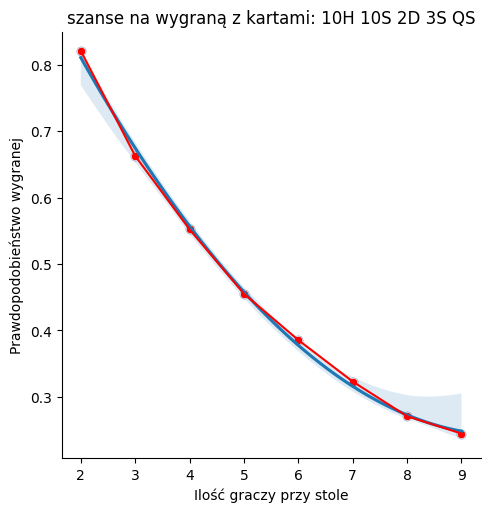

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(a)
#print(np.diff(list(a.values())))

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 10,5

#sns.scatterplot(data = a, color = 'red')
aa = pd.DataFrame().assign(X = a.keys(), Y = a.values())
sns.lmplot(data = aa, x= 'X', y = 'Y', order = 2)
sns.scatterplot(data = a, color = 'red', legend = True)
sns.lineplot(data = a, color = 'red', legend = True)
plt.title(f'szanse na wygraną z kartami: {" ".join(sorted(karteluszki))}')
plt.xticks([2,3,4,5,6,7,8,9])
plt.xlabel('Ilość graczy przy stole')
plt.ylabel('Prawdopodobieństwo wygranej')
#plt.legend()
plt.show()

<p><i>małe testy ręki</i></p>

In [ ]:
n_of_pairs = 0
n_of_two_pairs = 0
n_of_threes = 0
n_of_fours = 0
n_of_full_houses = 0
n_of_straights = 0
n_of_flushes = 0
n_of_straight_flushes = 0
n = 1_000_000
t = Deck()
t.shuffle()
h1 = Hand()
for i in range(n):
    h1.get_card(t,5)
    h1.check_hand()
    if len(h1.in_hand['fours']) == 1:
        n_of_fours +=1
    elif h1.in_hand['straight_flush']:
        n_of_straight_flushes += 1
    elif h1.in_hand['flush']:
        n_of_flushes +=1
    elif h1.in_hand['straight']: 
        n_of_straights +=1
    elif h1.in_hand['full_house']:
        n_of_full_houses += 1
    elif len(h1.in_hand['threes']) == 1:
        n_of_threes +=1
    elif len(h1.in_hand['pairs']) == 2:
        n_of_two_pairs += 1
    elif len(h1.in_hand['pairs']) == 1:
        n_of_pairs += 1
    
    h1.reset_hand()
    t.reset()
print(f'prawdopodobieństwo wyciągnięcia pary wynosi     {n_of_pairs/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia 2 par  wynosi   {n_of_two_pairs/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia trójki wynosi   {n_of_threes/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia strita wynoisi  {n_of_straights/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia koloru wynoisi  {n_of_flushes/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia Fulla wynosi    {n_of_full_houses/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia karety wynosi   {n_of_fours/n*100:.3f}%')
print(f'prawdopodobieństwo wyciągnięcia pokerka         {n_of_straight_flushes/n*100:.4f}%')


prawdopodobieństwo wyciągnięcia pary wynosi     42.237%
prawdopodobieństwo wyciągnięcia 2 par  wynosi   4.738%
prawdopodobieństwo wyciągnięcia trójki wynosi   2.087%
prawdopodobieństwo wyciągnięcia strita wynoisi  0.356%
prawdopodobieństwo wyciągnięcia koloru wynoisi  0.195%
prawdopodobieństwo wyciągnięcia Fulla wynosi    0.142%
prawdopodobieństwo wyciągnięcia karety wynosi   0.021%
prawdopodobieństwo wyciągnięcia pokerka         0.0019%


class Player:
    def __init__(self, name = ''):        
        self.name = name
        self.balance = 0
        self.hand = Hand()
        self.hand_history = []
    def __repr__(self):
        return f"""  \n player name:{self.name} \n current $$ :{self.balance} \n cards in hand: {self.hand.cards_in_hand}\n high card :{self.hand.high_card}"""


class Game:
    def __init__(self, players, blind = 0):
        self.start_time = None  # to work on
        self.end_time   = None  #  as above
        self.list_of_players= [] 
        self.deck = Deck()
        self.deck.shuffle()

        for player in players:
            self.list_of_players.append(player)
        
        self.loot = blind
        self.blind_value = 0
        self.small_blind_value = self.blind_value//2
        self.loot = self.blind_value + self.small_blind_value

    def end_game(self):
        return True
